In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

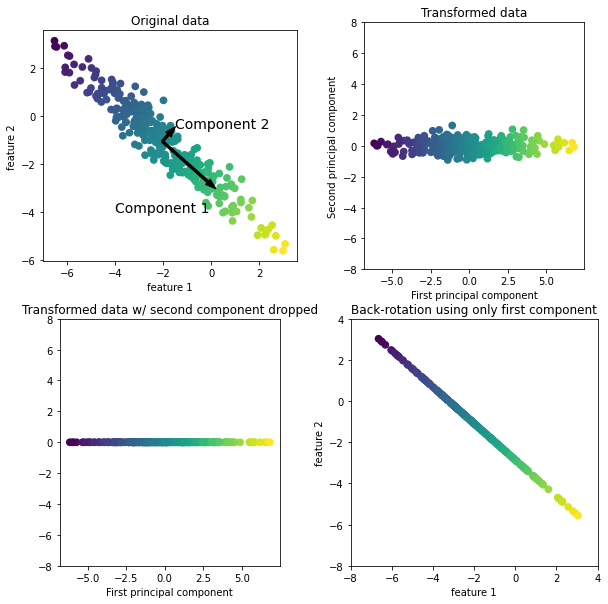

In [2]:
mglearn.plots.plot_pca_illustration()

In [3]:
df=pd.read_excel('sonar.csv.xlsx')

In [4]:
df.keys()

Index([  0.02, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109,
       0.2111, 0.1609, 0.1582, 0.2238, 0.0645,  0.066, 0.2273,   0.31, 0.2999,
       0.5078, 0.4797, 0.5783, 0.5071, 0.4328,  0.555, 0.6711, 0.6415, 0.7104,
        0.808, 0.6791, 0.3857, 0.1307, 0.2604, 0.5121, 0.7547, 0.8537, 0.8507,
       0.6692, 0.6097, 0.4943, 0.2744,  0.051, 0.2834, 0.2825, 0.4256, 0.2641,
       0.1386, 0.1051, 0.1343, 0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159,
       0.0072, 0.0167,  0.018, 0.0084,  0.009, 0.0032,    'R'],
      dtype='object')

In [5]:
df.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [6]:
df['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [7]:
df.loc[df['R']=='M','R']=0
df.loc[df['R']=='R','R']=1

# Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()      # Intializing
scaler.fit(df) 

StandardScaler()

In [10]:
scaled_data = scaler.transform(df)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components= 2)

In [13]:
pca.fit(scaled_data)

PCA(n_components=2)

In [14]:
x_pca = pca.transform(scaled_data)

In [15]:
print("Original Shape",scaled_data.shape)
print("Transformed Shape",x_pca.shape)

Original Shape (207, 61)
Transformed Shape (207, 2)


Text(0, 0.5, 'Second Principal Component')

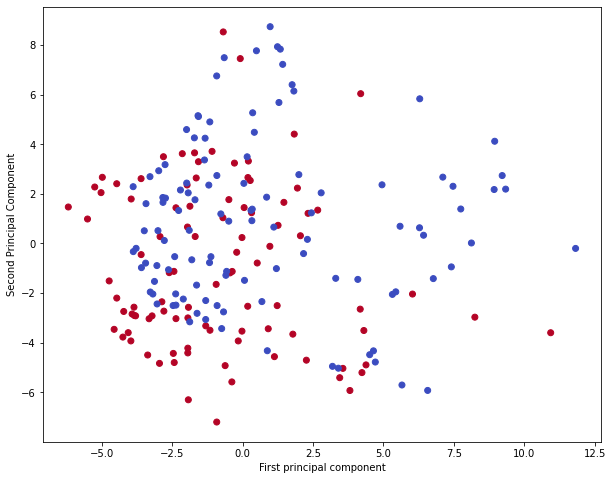

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['R'],cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Interpreting

In [17]:
pca.components_

array([[ 0.14414413,  0.15371845,  0.12406081,  0.1039023 ,  0.06517586,
         0.06073243,  0.07085978,  0.11302789,  0.10590528,  0.09661691,
         0.06932819,  0.04153182,  0.03382903,  0.02102783,  0.00983354,
        -0.00190594, -0.03799172, -0.07069922, -0.06746813, -0.04899551,
        -0.065834  , -0.1188253 , -0.14196455, -0.15078917, -0.15755973,
        -0.14931133, -0.12913341, -0.0568829 , -0.0203801 ,  0.05645534,
         0.08239621,  0.1026604 ,  0.11537528,  0.13387922,  0.14442106,
         0.14431544,  0.14286443,  0.18024108,  0.185473  ,  0.17598938,
         0.19978672,  0.19539858,  0.18162796,  0.16781784,  0.19993855,
         0.19820394,  0.1765745 ,  0.18431967,  0.17770945,  0.15975509,
         0.14911637,  0.14570505,  0.12796886,  0.12091798,  0.13340918,
         0.11852093,  0.1157803 ,  0.14035533,  0.14808106,  0.12203567,
        -0.06340622],
       [ 0.11265957,  0.12048152,  0.13359189,  0.14701501,  0.15638049,
         0.14134617,  0.13614

# Increamental PCA

In [18]:
from sklearn.decomposition import IncrementalPCA

In [19]:
pca = IncrementalPCA (n_components= 2)

In [20]:
pca.fit(scaled_data)

IncrementalPCA(n_components=2)

In [21]:
x_pca = pca.transform(scaled_data)

In [22]:
print("Original Shape",scaled_data.shape)
print("Transformed Shape",x_pca.shape)

Original Shape (207, 61)
Transformed Shape (207, 2)


Text(0, 0.5, 'Second Principal Component')

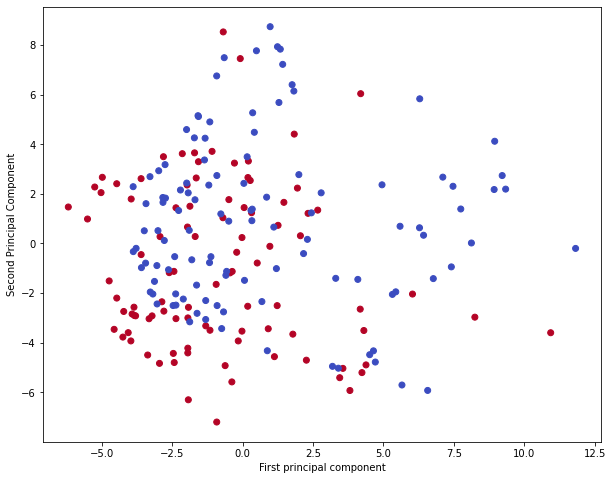

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['R'],cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [24]:
pca.components_

array([[ 0.14414413,  0.15371845,  0.12406081,  0.1039023 ,  0.06517586,
         0.06073243,  0.07085978,  0.11302789,  0.10590528,  0.09661691,
         0.06932819,  0.04153182,  0.03382903,  0.02102783,  0.00983354,
        -0.00190594, -0.03799172, -0.07069922, -0.06746813, -0.04899551,
        -0.065834  , -0.1188253 , -0.14196455, -0.15078917, -0.15755973,
        -0.14931133, -0.12913341, -0.0568829 , -0.0203801 ,  0.05645534,
         0.08239621,  0.1026604 ,  0.11537528,  0.13387922,  0.14442106,
         0.14431544,  0.14286443,  0.18024108,  0.185473  ,  0.17598938,
         0.19978672,  0.19539858,  0.18162796,  0.16781784,  0.19993855,
         0.19820394,  0.1765745 ,  0.18431967,  0.17770945,  0.15975509,
         0.14911637,  0.14570505,  0.12796886,  0.12091798,  0.13340918,
         0.11852093,  0.1157803 ,  0.14035533,  0.14808106,  0.12203567,
        -0.06340622],
       [ 0.11265957,  0.12048152,  0.13359189,  0.14701501,  0.15638049,
         0.14134617,  0.13614

In [28]:
df_comp = pd.DataFrame(pca.components_)
df_comp

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.144144,0.153718,0.124061,0.103902,0.065176,0.060732,0.070860,0.113028,0.105905,0.096617,...,0.145705,0.127969,0.120918,0.133409,0.118521,0.115780,0.140355,0.148081,0.122036,-0.063406
1,0.112660,0.120482,0.133592,0.147015,0.156380,0.141346,0.136143,0.127629,0.114645,0.119752,...,0.059737,0.059187,0.099212,0.098870,0.090219,0.078472,0.100470,0.079321,0.065613,-0.079267


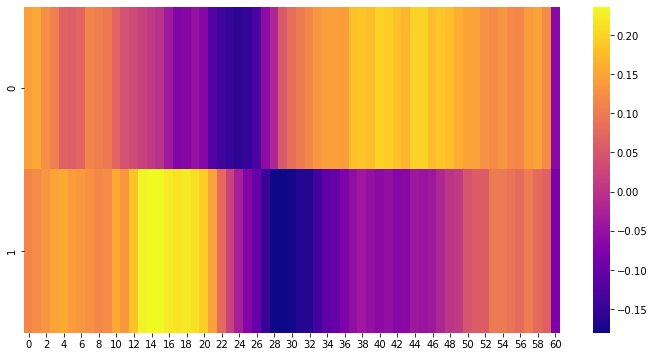

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

# Increamental PCA

In [30]:
from sklearn.decomposition import IncrementalPCA

In [31]:
pca = IncrementalPCA (n_components= 2)

In [32]:
pca.fit(scaled_data)

IncrementalPCA(n_components=2)

In [33]:
x_pca = pca.transform(scaled_data)

In [34]:
print("Original Shape",scaled_data.shape)
print("Transformed Shape",x_pca.shape)

Original Shape (207, 61)
Transformed Shape (207, 2)


Text(0, 0.5, 'Second Principal Component')

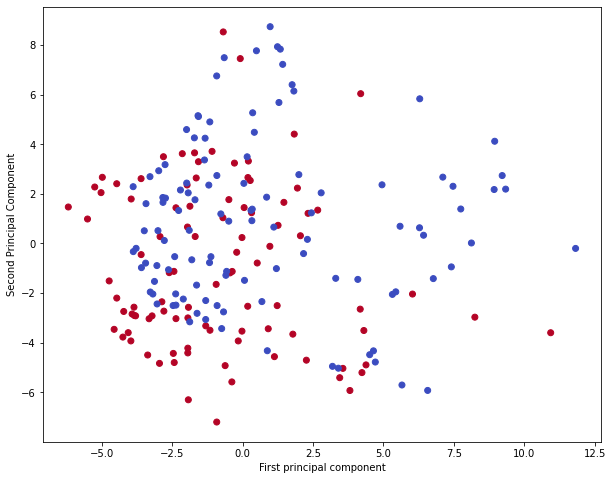

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['R'],cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# KPCA

In [36]:
from sklearn.decomposition import KernelPCA

In [37]:
pca=PCA(n_components=2)

In [38]:
X_PCA=pca.fit_transform(df)

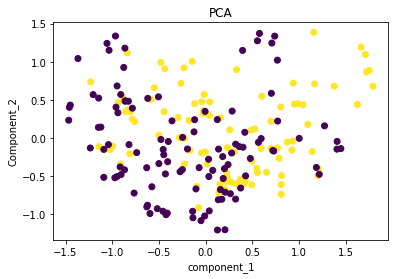

In [39]:
plt.title("PCA")
plt.scatter(X_PCA[:,0],X_PCA[:,1],c=df['R'])
plt.xlabel('component_1')
plt.ylabel('Component_2')
plt.show()

In [47]:
kpca=KernelPCA(kernel='rbf',gamma=10)

In [48]:
X_kpca=kpca.fit_transform(df)

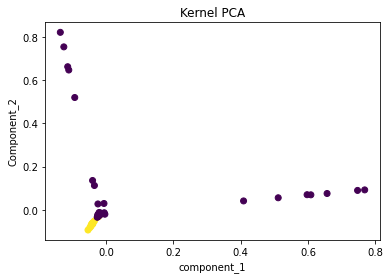

In [49]:
plt.title("Kernel PCA")
plt.scatter(X_kpca[:,0],X_kpca[:,1],c=df['R'])
plt.xlabel('component_1')
plt.ylabel('Component_2')
plt.show()